# Initialization in 1866 based on synthetic experiments

We here present a new method to initialize past glacier states from climate information using the Open Global Glacier Model. The method consists of three main steps: generation of glacier states, identification of glacier candidates and their evaluation. The method is explained in detail in [Eis et al. (2019)](https://tc.copernicus.org/articles/13/3317/2019/tc-13-3317-2019.html). This notebook shows how to apply the developped method. A proper installation of OGGM and all dependencies is required to run this method. Knowledge on how to run OGGM is required!

### Set-up

In [1]:
import sys
import os
import salem

from initialization.core import *
from initialization.plots import *

from oggm import cfg, workflow,utils
import warnings
#warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

%matplotlib inline
# settings for plots
mpl.rcParams['axes.linewidth'] = 3
mpl.rcParams['xtick.major.width'] = 3
mpl.rcParams['ytick.major.width'] = 3
mpl.rcParams['font.size'] =15
mpl.rcParams['font.weight'] = 'medium'
mpl.rcParams['axes.labelweight'] = 'medium'
mpl.rcParams['legend.fontsize']= 15 
mpl.rcParams['lines.linewidth']=3
mpl.rcParams['figure.figsize'] = 10,10

In [2]:
cfg.initialize()

# path to working and plot directory
WORKING_DIR = 'workdir'
cfg.PATHS['working_dir'] = WORKING_DIR

utils.mkdir(cfg.PATHS['working_dir'], reset=False)
cfg.PATHS['plot_dir'] = os.path.join(cfg.PATHS['working_dir'], 'plots')
utils.mkdir(cfg.PATHS['plot_dir'], reset=False)

# Use multiprocessing?
cfg.PARAMS['use_multiprocessing'] = True

# How many grid points around the glacier?
border = 160

# Set to True for operational runs
cfg.PARAMS['continue_on_error'] = False

# IMPORTANT!!! Otherwise the initialization method won't work as it rely on this output. 
cfg.PARAMS['store_model_geometry'] = True

2022-08-08 11:19:23: oggm.cfg: Reading default parameters from the OGGM `params.cfg` configuration file.
2022-08-08 11:19:23: oggm.cfg: Multiprocessing switched OFF according to the parameter file.
2022-08-08 11:19:23: oggm.cfg: Multiprocessing: using all available processors (N=32)
2022-08-08 11:19:23: oggm.cfg: Multiprocessing switched ON after user settings.
2022-08-08 11:19:23: oggm.cfg: PARAMS['store_model_geometry'] changed from `False` to `True`.


### Glacier outlines and climate data
We will use data from the preprocessed directories level 1 and then preprocess them based on the HISTALP climate data 

2022-08-08 11:19:23: oggm.cfg: PARAMS['baseline_climate'] changed from `CRU` to `HISTALP`.
2022-08-08 11:19:23: oggm.cfg: PARAMS['run_mb_calibration'] changed from `False` to `True`.
2022-08-08 11:19:23: oggm.cfg: WARNING: adding an unknown parameter `optimize_inversion_params`:`False` to PARAMS.
2022-08-08 11:19:23: oggm.workflow: init_glacier_directories from prepro level 2 on 66 glaciers.
2022-08-08 11:19:23: oggm.workflow: Execute entity tasks [gdir_from_prepro] on 66 glaciers
2022-08-08 11:19:24: oggm.utils: /home/users/julia/OGGM/download_cache/cluster.klima.uni-bremen.de/~oggm/gdirs/oggm_v1.4/L1-L2_files/centerlines/RGI62/b_160/L2/RGI60-11/RGI60-11.00.tar verified successfully.
2022-08-08 11:19:27: oggm.utils: /home/users/julia/OGGM/download_cache/cluster.klima.uni-bremen.de/~oggm/gdirs/oggm_v1.4/L1-L2_files/centerlines/RGI62/b_160/L2/RGI60-11/RGI60-11.01.tar verified successfully.


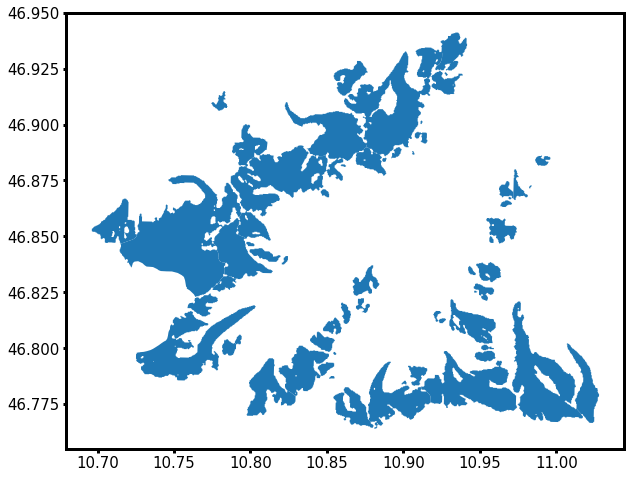

2022-08-08 11:19:28: oggm.core.climate: (RGI60-11.00746) process_climate_data
2022-08-08 11:19:28: oggm.core.climate: (RGI60-11.00719) process_climate_data
2022-08-08 11:19:28: oggm.core.climate: (RGI60-11.00666) process_climate_data
2022-08-08 11:19:28: oggm.core.climate: (RGI60-11.00887) process_climate_data
2022-08-08 11:19:28: oggm.core.climate: (RGI60-11.00897) process_climate_data
2022-08-08 11:19:28: oggm.core.climate: (RGI60-11.00945) process_climate_data
2022-08-08 11:19:28: oggm.core.climate: (RGI60-11.00698) process_climate_data
2022-08-08 11:19:28: oggm.core.climate: (RGI60-11.00782) process_climate_data
2022-08-08 11:19:28: oggm.core.climate: (RGI60-11.00957) process_climate_data
2022-08-08 11:19:28: oggm.core.climate: (RGI60-11.00687) process_climate_data
2022-08-08 11:19:28: oggm.core.climate: (RGI60-11.00787) process_climate_data
2022-08-08 11:19:28: oggm.core.climate: (RGI60-11.00720) process_climate_data
2022-08-08 11:19:28: oggm.core.climate: (RGI60-11.00648) process

In [3]:
# read shapefile with 66 glaciers in the Oetztal Alps
rgidf = salem.read_shapefile('../rgi/oetztal.shp')

# sort for efficient using
rgidf = rgidf.sort_values('Area', ascending=False)
rgidf.plot()

# Use HISTALP climate file
cfg.PARAMS['baseline_climate'] = 'HISTALP'
cfg.PARAMS['run_mb_calibration'] =True
cfg.PARAMS['optimize_inversion_params'] = False

# select Hintereisferner only
gdirs = workflow.init_glacier_directories(rgidf.RGIId,from_prepro_level=2, prepro_border=border)

### Preprocessing of OGGM
The function "preprocessing(gdirs)" runs all required steps of OGGM, before we can start to reconstruct the glacier. This includes e.g. the calculation of the flowlines, the processing of the HISTALP dataset, and the inversion. Cause to large computational costs, we will focus from now on one glacier (a small one, becasue the calculation is quicker then), only.

In [4]:
# this function only needs to be run ONE time
preprocessing(gdirs)

2022-08-08 11:19:28: oggm.workflow: Applying global task climate_tasks on 66 glaciers
2022-08-08 11:19:28: oggm.workflow: Execute entity tasks [process_climate_data] on 66 glaciers
2022-08-08 11:19:30: oggm.core.climate: Applying global task compute_ref_t_stars on 66 glaciers
2022-08-08 11:19:30: oggm.core.climate: Compute the reference t* and mu* for WGMS glaciers
2022-08-08 11:19:30: oggm.utils: Applying global task get_ref_mb_glaciers on 66 glaciers
2022-08-08 11:19:30: oggm.workflow: Execute entity tasks [t_star_from_refmb] on 5 glaciers
2022-08-08 11:19:30: oggm.workflow: Execute entity tasks [local_t_star] on 66 glaciers
2022-08-08 11:19:30: oggm.workflow: Execute entity tasks [mu_star_calibration] on 66 glaciers
2022-08-08 11:19:31: oggm.workflow: Applying global task inversion_tasks on 66 glaciers
2022-08-08 11:19:31: oggm.workflow: Execute entity tasks [prepare_for_inversion] on 66 glaciers
2022-08-08 11:19:31: oggm.workflow: Execute entity tasks [mass_conservation_inversion] 

### Synthetic experiments
We use synthetic experiments to test the performance of our method. As the method is still under developpment, we recommend to use the method only in combination with the synthetic experiments. Otherwise it is not guaranteed, that the glacier candidates converge towards the observation and wrong reconstructions could result. A further development of the method allowing the reconstruction of real-world cases is already under developement and will follow soon. 

In [5]:
gdir = workflow.init_glacier_directories('RGI60-11.00779')[0]

2022-08-08 11:19:31: oggm.workflow: Execute entity tasks [GlacierDirectory] on 1 glaciers


In [6]:
# creates the experiments for a list of glacier in parallel
synthetic_experiments_parallel([gdir], 1866,2000)

2022-08-08 11:19:32: oggm.core.flowline: (RGI60-11.00779) run_random_climate
2022-08-08 11:19:32: oggm.core.flowline: (RGI60-11.00779) flowline_model_run
2022-08-08 11:19:44: oggm.core.flowline: (RGI60-11.00779) run_from_climate_data_synthetic_experiment
2022-08-08 11:19:44: oggm.core.flowline: You are attempting to run_with_climate_data at dates prior to the RGI inventory date. This may indicate some problem in your workflow. Consider using `fixed_geometry_spinup_yr` for example.
2022-08-08 11:19:44: oggm.core.flowline: (RGI60-11.00779) flowline_model_run_synthetic_experiment


A glacier for the year 1866 is created by running a random climate task with the temperature bias -1 for 600 years. This glacier will be run forward from 1866 to 2000. The resulting glacier is from now on the observed glacier. 

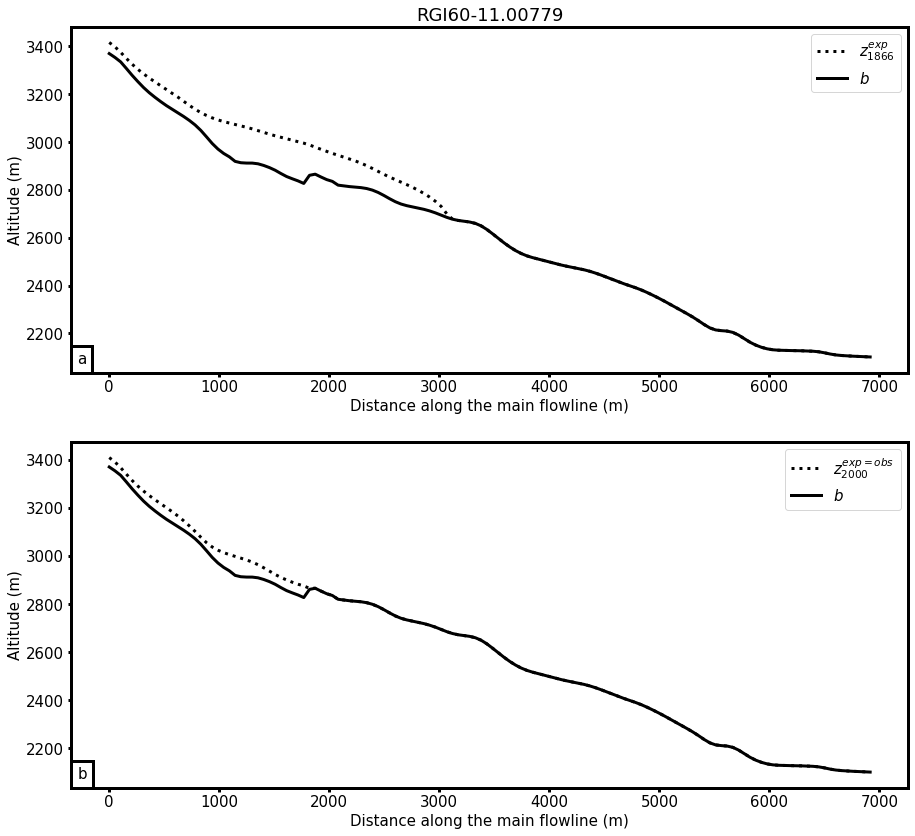

In [7]:
# reads the expermient model
ep = gdir.get_filepath('model_geometry', filesuffix='_synthetic_experiment')
ex_mod = FileModel(ep)

# plots cross section along the flowline in 1866 and 2000
plot_experiment(gdir,ex_mod,1866,2000,cfg.PATHS['plot_dir'])

Subfigure a) shows the synthetic experiment glacier in 1866 and subfigure b) the synthetic experiment glacier in 2000. 

### Reconstruction of the state in 1866
We now try to reconstruct the synthetic experiment glacier in 1866 by only using information about the past climate and the geometry of the synthetic experiment glacier in 2000. To this end, you need to call the function `find_possible_glaciers(gdir,y0,ye,n)`, with the GlacierDirectory `gdir`, the year of the searched state `y0`, the year of the observation `ye` and `n` the number of glacier candidates to test. We choose `n=200` and reconstruct this glacier in `y0=1866`. This computation can take a while (...)


In [8]:
results = find_possible_glaciers(gdir, 1866, 2000, 200)
results['volume'] = results.model.apply(lambda x: x.volume_km3)
results

2022-08-08 11:19:48: oggm.core.flowline: (RGI60-11.00779) run_random_climate1866_random_100_-2.5
2022-08-08 11:19:48: oggm.core.flowline: (RGI60-11.00779) run_random_climate1866_random_1_-2.95
2022-08-08 11:19:48: oggm.core.flowline: (RGI60-11.00779) run_random_climate1866_random_0_-3.0
2022-08-08 11:19:48: oggm.core.flowline: (RGI60-11.00779) run_random_climate1866_random_484_-1.9
2022-08-08 11:19:48: oggm.core.flowline: (RGI60-11.00779) run_random_climate1866_random_49_-2.65
2022-08-08 11:19:48: oggm.core.flowline: (RGI60-11.00779) run_random_climate1866_random_9_-2.85
2022-08-08 11:19:48: oggm.core.flowline: (RGI60-11.00779) run_random_climate1866_random_324_-2.1
2022-08-08 11:19:48: oggm.core.flowline: (RGI60-11.00779) run_random_climate1866_random_400_-2.0
2022-08-08 11:19:48: oggm.core.flowline: (RGI60-11.00779) run_random_climate1866_random_361_-2.05
2022-08-08 11:19:48: oggm.core.flowline: (RGI60-11.00779) run_random_climate1866_random_225_-2.25
2022-08-08 11:19:48: oggm.core.f

,model,fitness,fitness_fls,temp_bias,time,volume
0,<oggm.core.flowline.FileModel object at 0x7f8d...,0.020407,1.448681,-1.40,205,0.240119
1,<oggm.core.flowline.FileModel object at 0x7f8d...,0.025929,1.425366,-1.40,251,0.275062
2,<oggm.core.flowline.FileModel object at 0x7f8d...,0.021275,1.444813,-1.40,444,0.263441
3,<oggm.core.flowline.FileModel object at 0x7f8d...,0.022048,1.441402,-1.40,511,0.270401
4,<oggm.core.flowline.FileModel object at 0x7f8d...,0.022979,1.437403,-1.35,288,0.256472
...,...,...,...,...,...,...
195,<oggm.core.flowline.FileModel object at 0x7f8d...,0.019557,1.452600,-1.50,592,0.251766
196,<oggm.core.flowline.FileModel object at 0x7f8d...,0.019857,1.451212,-1.45,335,0.249429
197,<oggm.core.flowline.FileModel object at 0x7f8d...,0.020698,1.447354,-1.45,393,0.247104
198,<oggm.core.flowline.FileModel object at 0x7f8d...,0.024252,1.432124,-1.45,471,0.272740


The output is a `panda.DataFrame()` with following informations for each tested glacier candidate:
- OGGM's FileModel of the past climate run from y0 to ye, 
- the objective (also called fitness value), and 
- the temperature bias and time point from the random climate runs to identify later which candidate was picked.

From the FileModel all required inforamtions (e.g. volume, area, length, surface elevations at grid points) can be obtained. All previous model_runs will be saved and stored in a new directory named by the initialization year. If the function should be run a second time for the same glacier (e.g. with more candidates), the algorithm first checks, if this model_run was already done and reads the corresponding FileModel, if this is the case. Hereby it is avoided that the same runs will be run twice. Let's try this out and run the same function again ...

In [9]:
results = find_possible_glaciers(gdir, 1866, 2000, 200)
results

,model,fitness,fitness_fls,temp_bias,time,volume
0,<oggm.core.flowline.FileModel object at 0x7f8d...,0.020407,1.448681,-1.40,205,0.240119
1,<oggm.core.flowline.FileModel object at 0x7f8d...,0.025929,1.425366,-1.40,251,0.275062
2,<oggm.core.flowline.FileModel object at 0x7f8c...,0.021275,1.444813,-1.40,444,0.263441
3,<oggm.core.flowline.FileModel object at 0x7f8d...,0.022048,1.441402,-1.40,511,0.270401
4,<oggm.core.flowline.FileModel object at 0x7f8d...,0.022979,1.437403,-1.35,288,0.256472
...,...,...,...,...,...,...
195,<oggm.core.flowline.FileModel object at 0x7f8d...,0.019557,1.452600,-1.50,592,0.251766
196,<oggm.core.flowline.FileModel object at 0x7f8d...,0.019857,1.451212,-1.45,335,0.249429
197,<oggm.core.flowline.FileModel object at 0x7f8d...,0.020698,1.447354,-1.45,393,0.247104
198,<oggm.core.flowline.FileModel object at 0x7f8d...,0.024252,1.432124,-1.45,471,0.272740


### Graphics
#### Glacier candidates
The function `plot_candidates` plots the random climate tasks and the identified glacier candidates, colored by their Fitness value. 

TypeError: matplotlib.axes._axes.Axes.scatter() got multiple values for keyword argument 'norm'

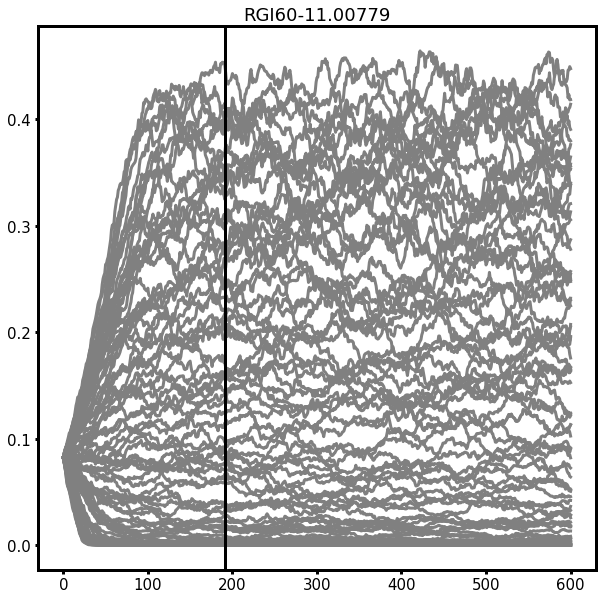

In [10]:
plot_candidates(gdir, results, 1866, 'step3',cfg.PATHS['plot_dir'])

There is a bug in pandas, which will be solved in pandas v. 1.5.0! See here for more information: https://github.com/pandas-dev/pandas/pull/45966
We are avoiding the coloring of the Fitness value --> 'step2'

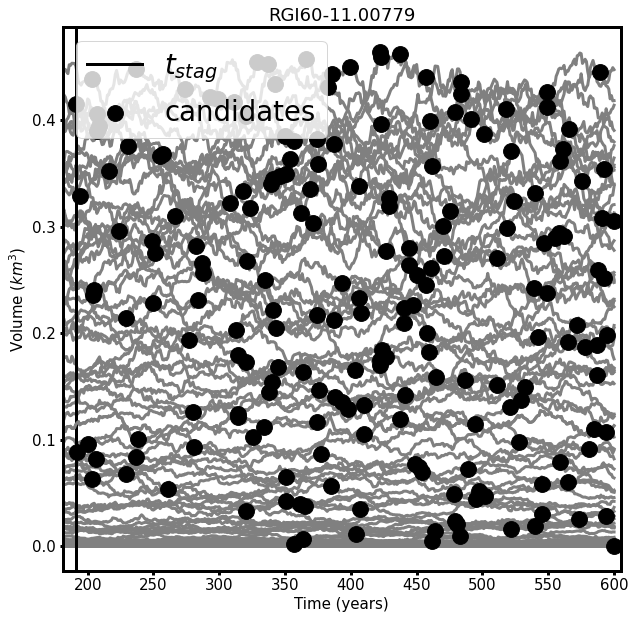

In [11]:
plot_candidates(gdir, results, 1866, 'step2',cfg.PATHS['plot_dir'])

#### Cross-Section colored by Fitness value
The function `plot_surface` plot the cross-Section along the main flowline of all glacier candidates at 1866 and 2000, as well as the volumes between 1866-2000. 

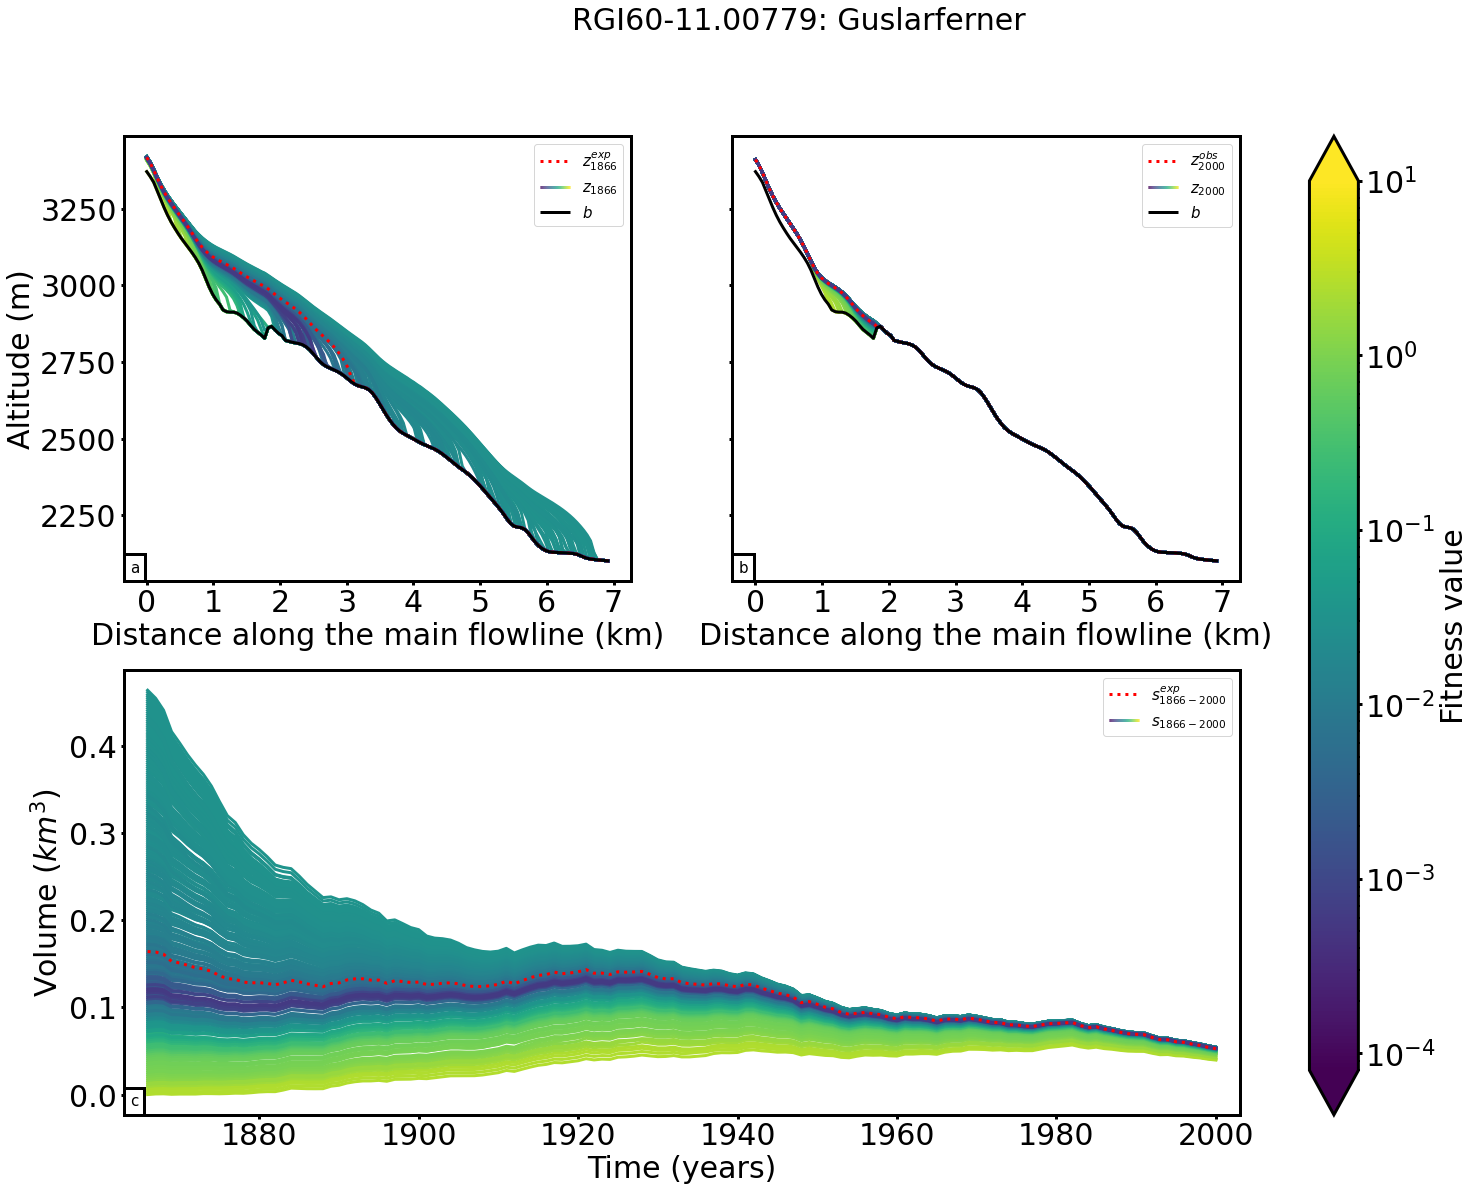

In [12]:
plot_fitness_values(gdir,results, ex_mod,1866,2000,cfg.PATHS['plot_dir'])

We suggest to accept all candidates with a fitness value smaller than 1 (which are in this case all). 

In [13]:
results[results['fitness']<= 1]

,model,fitness,fitness_fls,temp_bias,time,volume,Fitness value
0,<oggm.core.flowline.FileModel object at 0x7f8d...,0.020407,1.448681,-1.40,205,0.240119,0.020407
1,<oggm.core.flowline.FileModel object at 0x7f8d...,0.025929,1.425366,-1.40,251,0.275062,0.025929
2,<oggm.core.flowline.FileModel object at 0x7f8c...,0.021275,1.444813,-1.40,444,0.263441,0.021275
3,<oggm.core.flowline.FileModel object at 0x7f8d...,0.022048,1.441402,-1.40,511,0.270401,0.022048
4,<oggm.core.flowline.FileModel object at 0x7f8d...,0.022979,1.437403,-1.35,288,0.256472,0.022979
...,...,...,...,...,...,...,...
194,<oggm.core.flowline.FileModel object at 0x7f8d...,0.019113,1.454696,-1.50,588,0.258766,0.019113
195,<oggm.core.flowline.FileModel object at 0x7f8d...,0.019557,1.452600,-1.50,592,0.251766,0.019557
196,<oggm.core.flowline.FileModel object at 0x7f8d...,0.019857,1.451212,-1.45,335,0.249429,0.019857
197,<oggm.core.flowline.FileModel object at 0x7f8d...,0.020698,1.447354,-1.45,393,0.247104,0.020698


#### Median state 
We also found out that the median state of the 5% quantile of all glaciers with a fitness value smaller than 1 fits well with the experient. To create a plot, showing the interquantile range and the median state you can use the function `plot_median`:

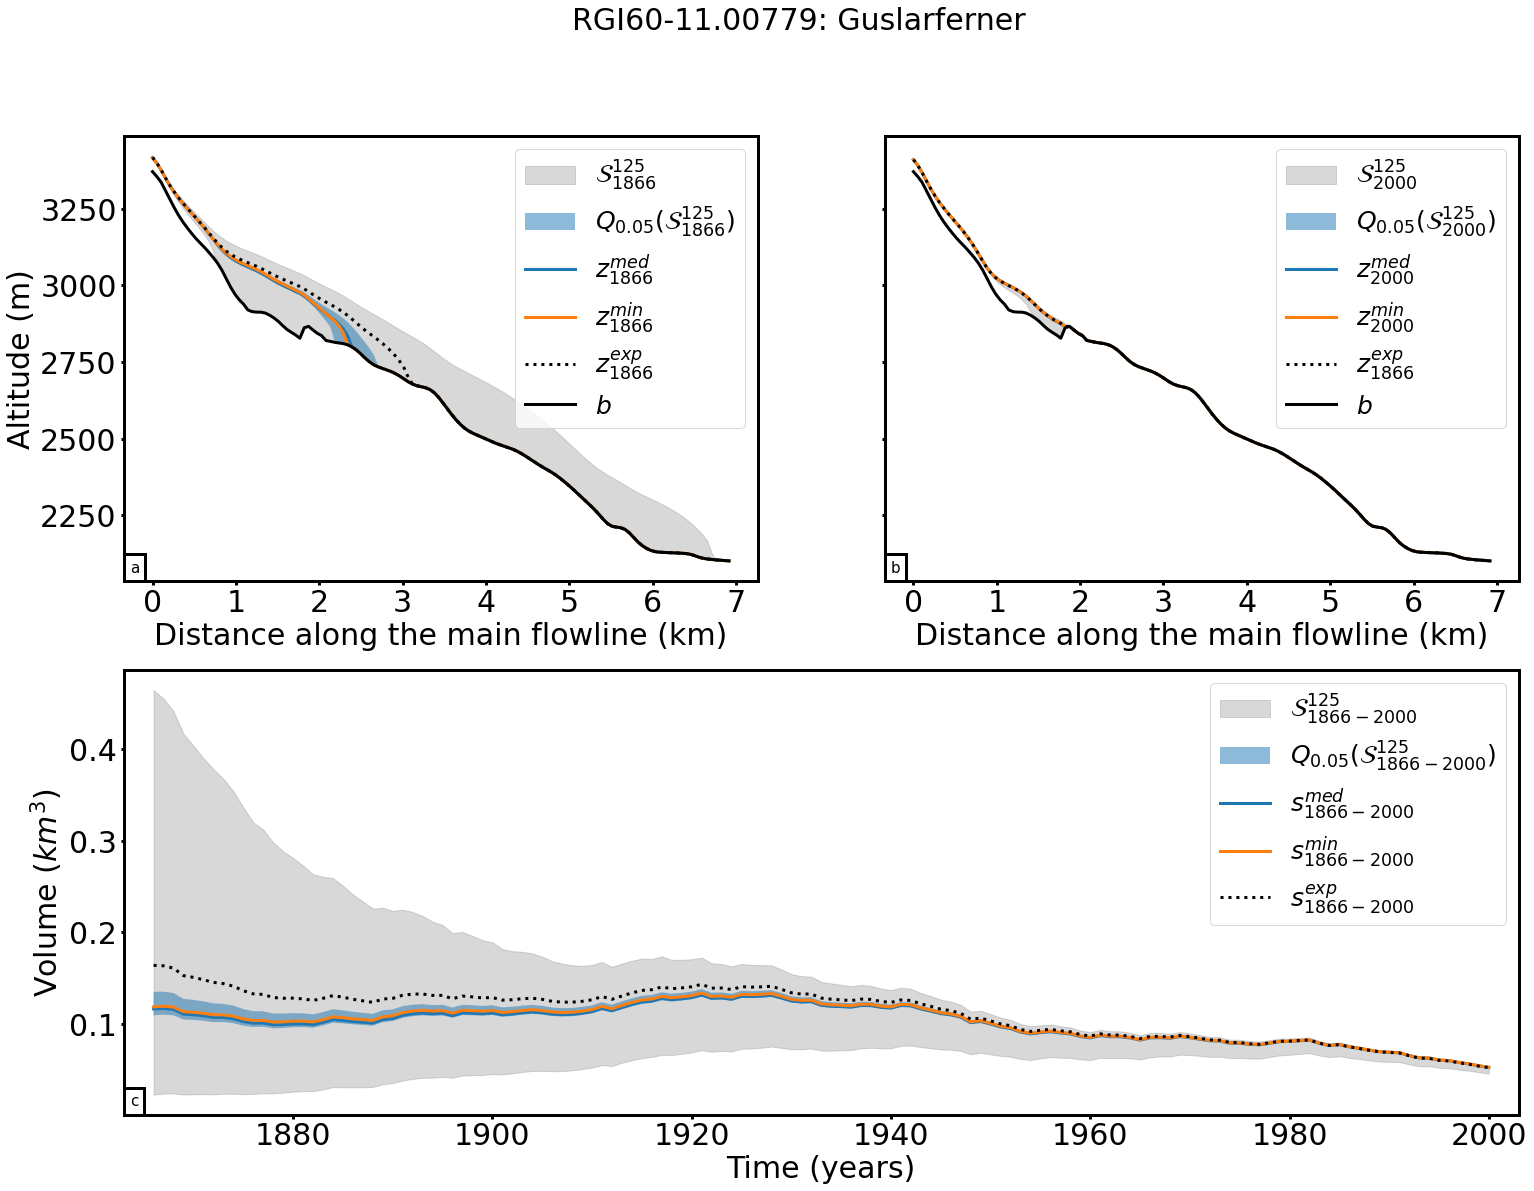

In [14]:
med_mod = plot_median(gdir,results,125,ex_mod,1866,2000, cfg.PATHS['plot_dir'])

The grey area, shows all glacier states with a fitness value smaller than 1. The blue area is the 5% quantile and the blue line represents the median state (here: identically with the orange line (minimum fitness value)). Additionally this function returns the FileModel of the median state to be able to use it for other runs. This is the best estimate of the reconstructed state in 1866. 

The uncertainties of the method are reduced, when running this state forward in time: 

In [ ]:
print('error to experiment in 1866:', str(med_mod.volume_km3_ts()[1866]-ex_mod.volume_km3_ts()[1866]))

print('error to experiment in 1900', str(med_mod.volume_km3_ts()[1900]-ex_mod.volume_km3_ts()[1900]))

print('error to experiment in 1950', str(med_mod.volume_km3_ts()[1950]-ex_mod.volume_km3_ts()[1950]))